In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
import pandas_profiling
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_main = pd.read_csv('stud_math.csv')
stud = stud_main.copy()

In [2]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.75/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [3]:
'''Первичный осмотр'''
display(stud.head(10))
stud.info()

pandas_profiling.ProfileReport(stud, explorative=True)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [4]:
'''Первичные выводы'''
#В ДФ информация о 395 учащихся. Как видно количество пустых мест ни в одной колонке не превышает 11%, распределены равномерно,
#Удолять столбцы не имеет смысла . Видна полноя кореляция между столбцами studytime и studytime, grnular, а так же высокоя, около 75%
#кореляция между столбцами Fedu и Medu. 

'Первичные выводы'

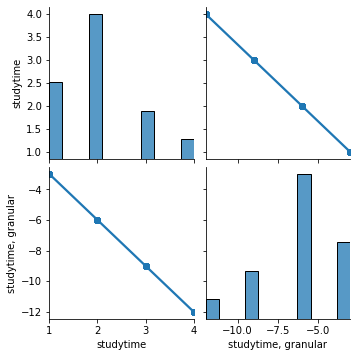

In [5]:
stud_corr = ['studytime', 'studytime, granular']
sns.pairplot(stud[stud_corr], kind = 'reg')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'studytime, granular'}>,
        <AxesSubplot:title={'center':'famrel'}>],
       [<AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'absences'}>],
       [<AxesSubplot:title={'center':'score'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

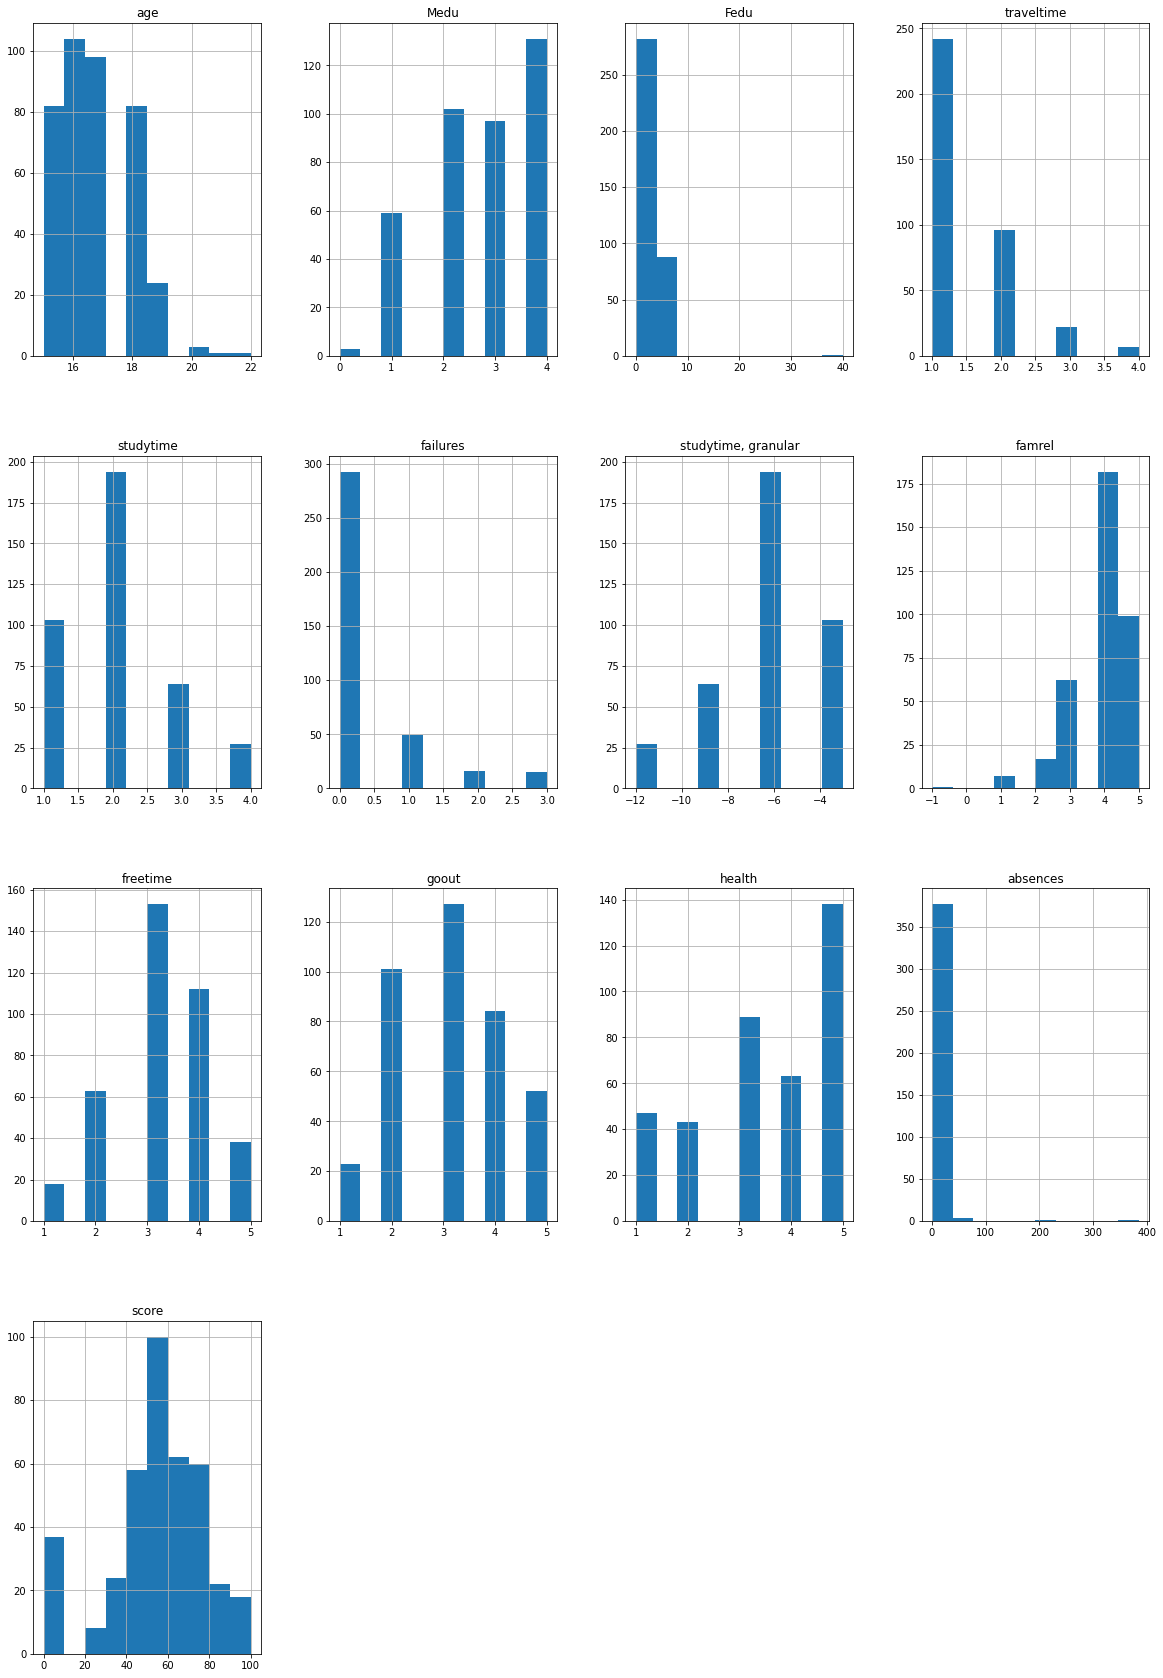

In [6]:
stud.hist(figsize=(20, 30))

In [7]:
'''Промежуточные выводы'''
# Числовые признаки abscences, age, score
# в absences  решено заменить аномальные значения медианой, для облегчения работы с переменной
# в переменных farmel, fedu,  найдены выбросы, решено заменить их на более корректные данные
# столбец studytime, granular  решено удалить, так он полностью обратно корелирует c studytime
# переменную   можно разбить на два значения,  до 18 и после 18 лет
# schoolsup, famsup решено обйеденить в одну
# в главном столбце 1,5% пропусков, удаляем

'Промежуточные выводы'

In [8]:
'''предобработка'''
stud['>18<'] = stud.age.apply(lambda x: '<18' if x < 18 else '>18')
stud.absences = stud.absences.apply(
    lambda x: stud.absences.median() if x > 100 else x)
stud.drop('studytime, granular', axis=1, inplace=True)
stud['total_eduq'] = stud.Fedu + stud.Medu
stud.famrel = stud.famrel.replace(-1, 1)
stud.Fedu = stud.Fedu.replace(40, 4)
stud.dropna(subset=['score'], inplace=True)

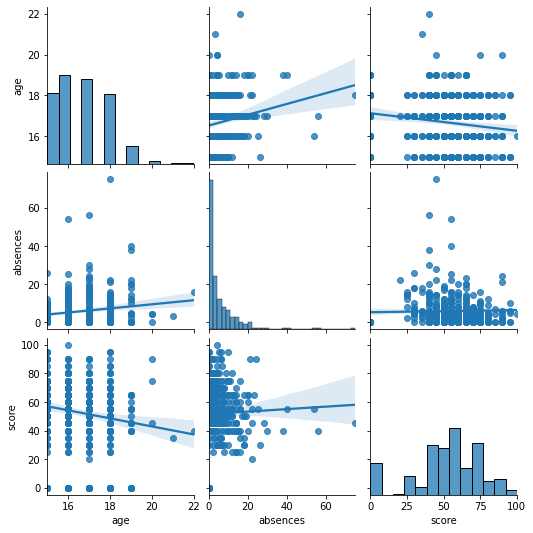

In [9]:
'''корреляционный анализ, с количественными признаками'''
stud_main = ['age', 'absences', 'score']
sns.pairplot(stud[stud_main], kind='reg')

In [10]:
stud[stud_main].corr()

age  absences     score
age       1.000000  0.169071 -0.155726
absences  0.169071  1.000000  0.030943
score    -0.155726  0.030943  1.000000

In [11]:
# связь score и abscences очень не значительна, значит можно удалить

In [12]:
'''Анализ номинативных признаков'''

'Анализ номинативных признаков'

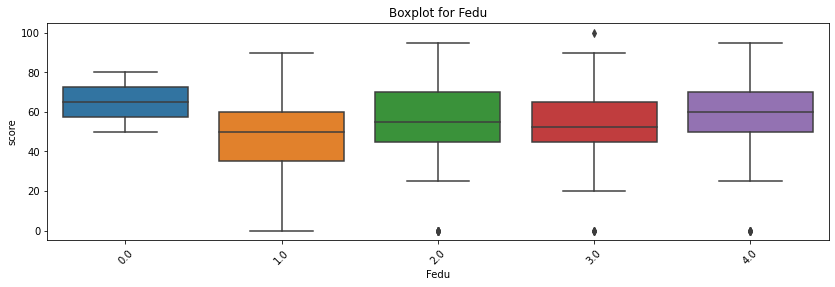

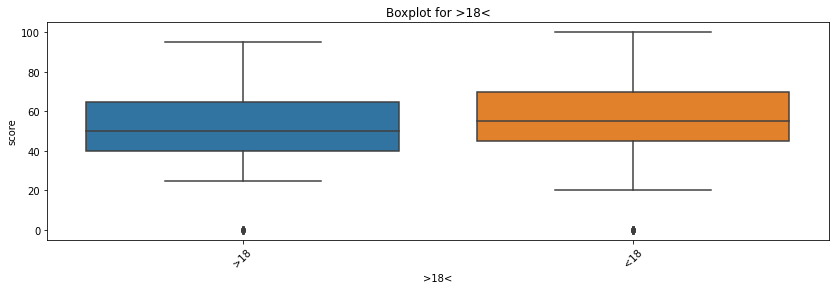

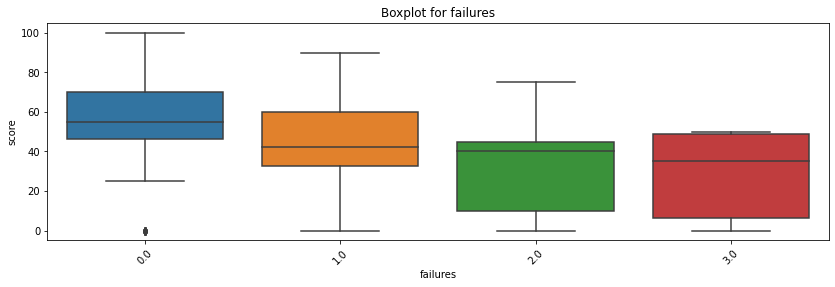

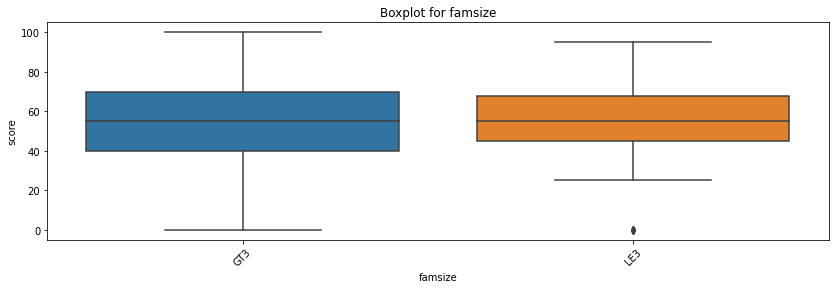

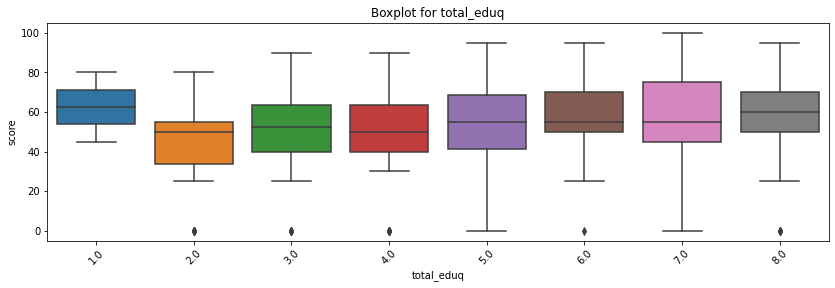

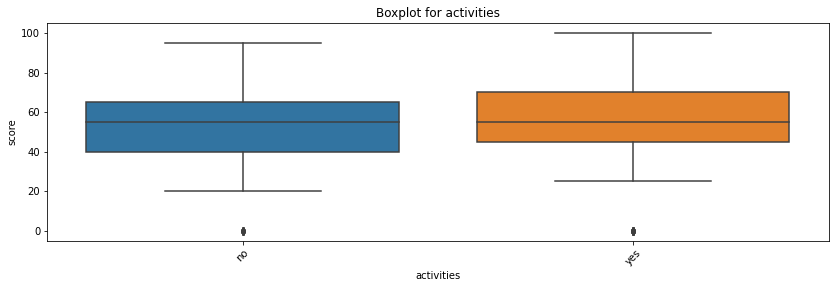

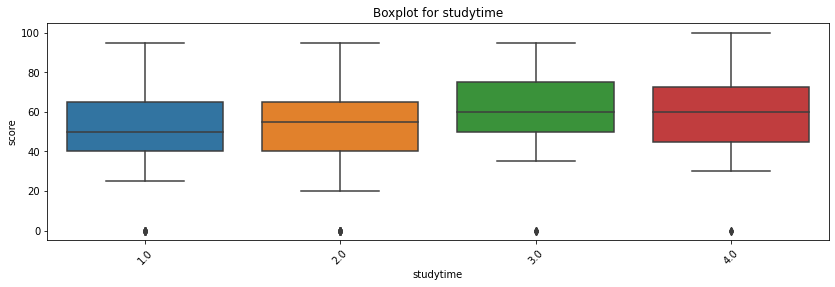

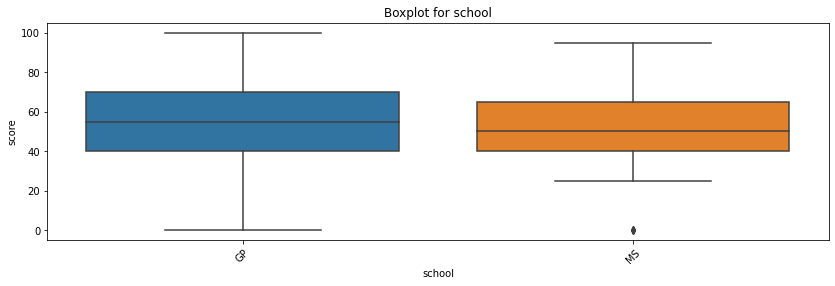

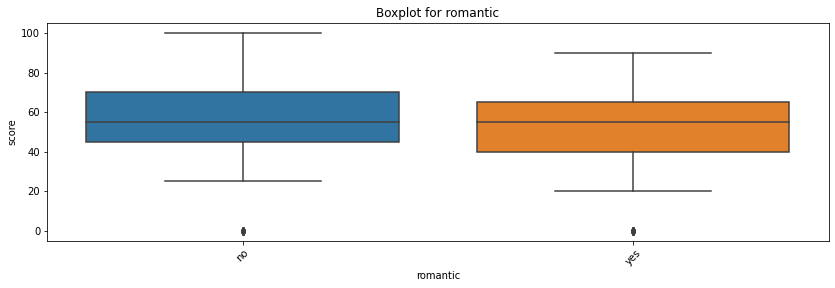

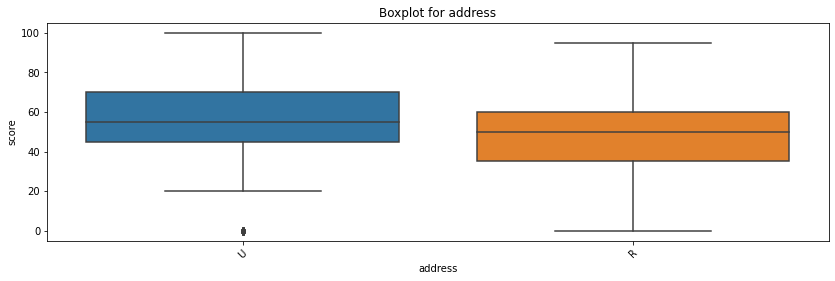

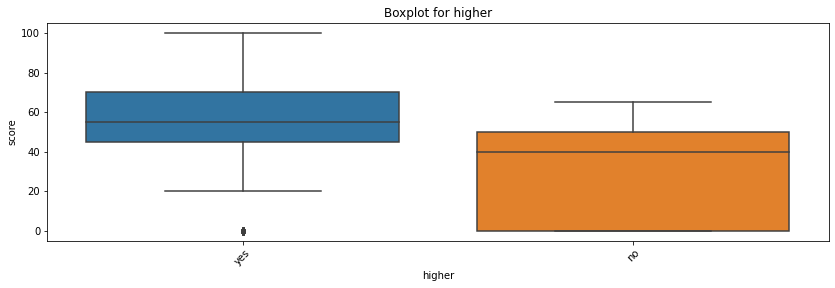

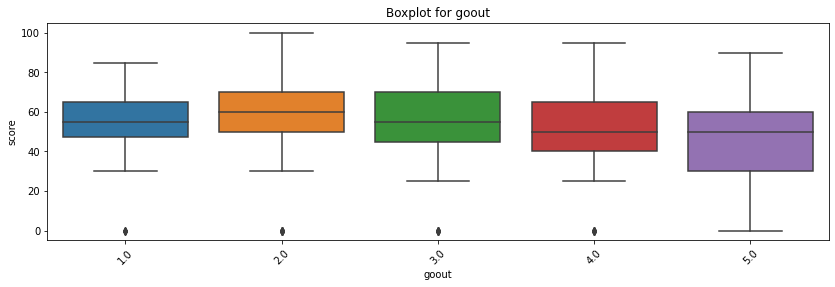

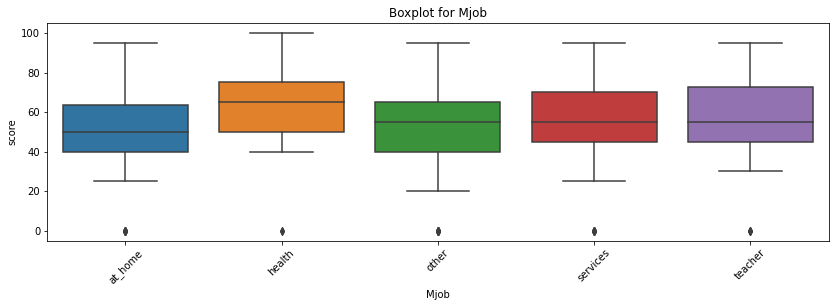

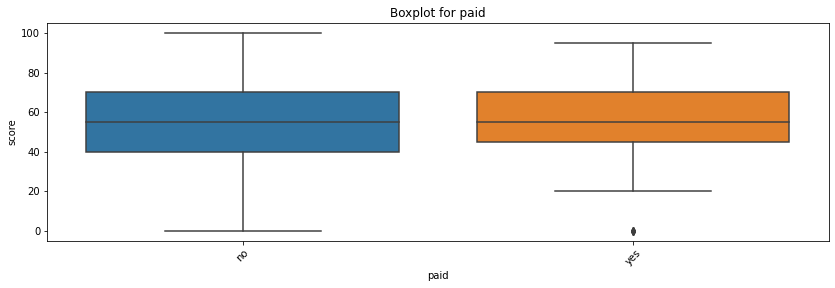

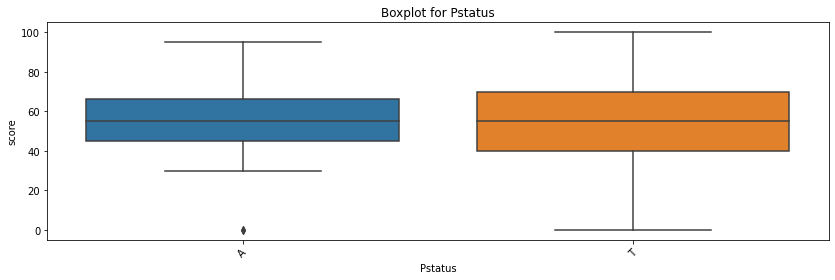

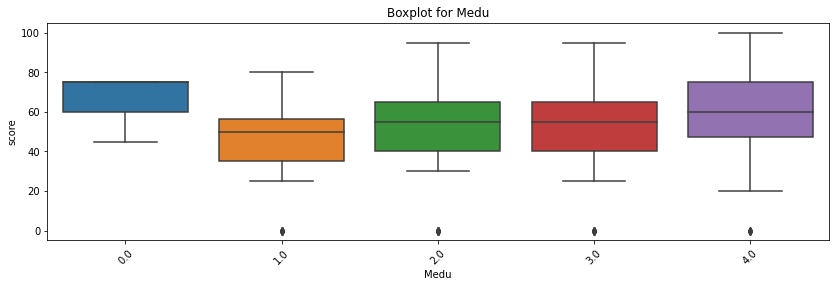

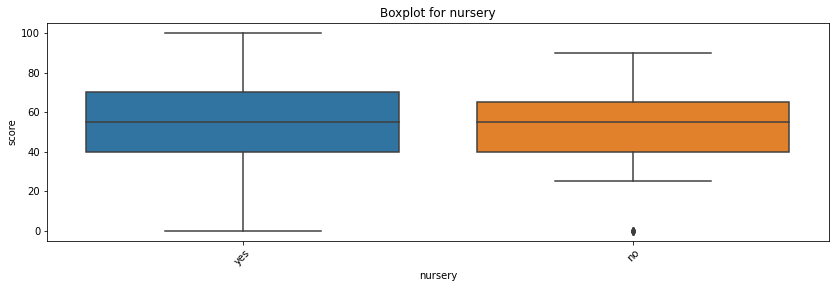

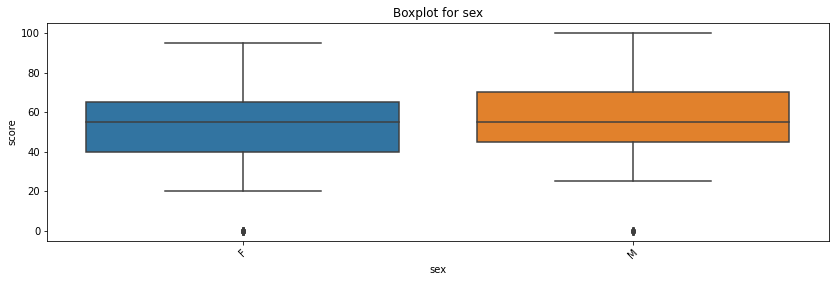

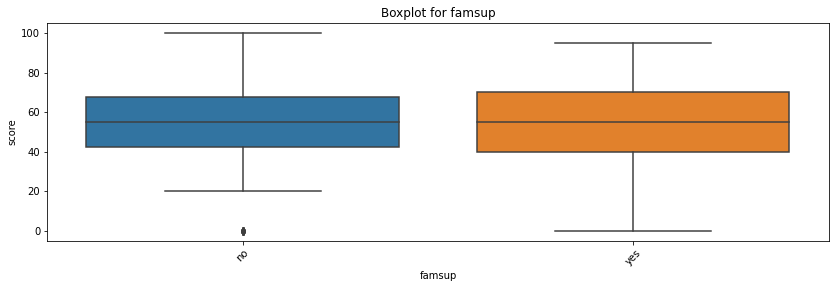

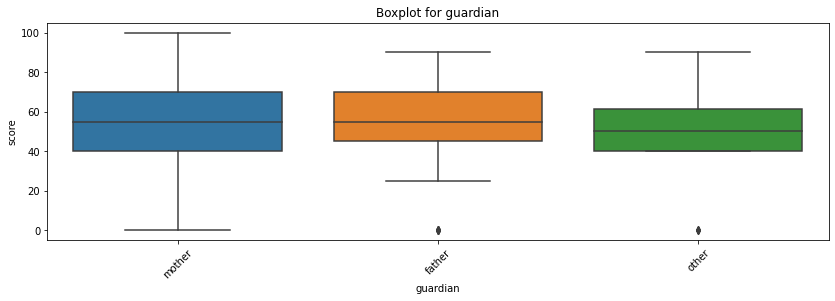

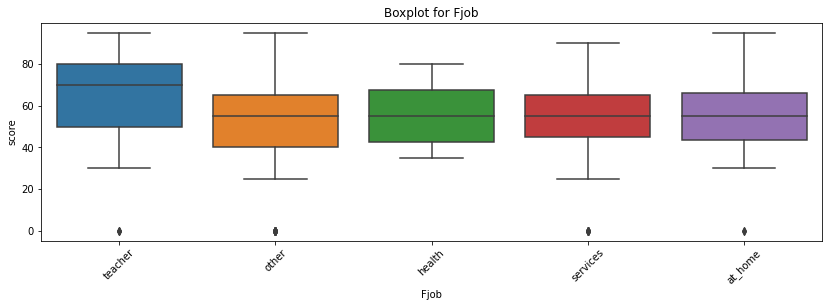

In [14]:
for col in ['Fedu', '>18<', 'failures', 'famsize', 'total_eduq', 'activities', 'studytime',
            'school', 'romantic', 'address', 'higher', 'goout', 'Mjob', 'paid', 'Pstatus', 'Medu',
            'nursery', 'sex', 'famsup', 'guardian', 'Fjob']:
    get_boxplot(col)

In [15]:
for col in ['Fedu', '>18<', 'failures', 'famsize', 'total_eduq', 'activities', 'studytime',
            'school', 'romantic', 'address', 'higher', 'goout', 'Mjob', 'paid', 'Pstatus', 'Medu',
            'nursery', 'sex', 'famsup', 'guardian', 'Fjob']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки >18<
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки famsize
Найдены статистически значимые различия для колонки total_eduq
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки school
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки Pstatus
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки nursery
Найдены статистически значимые различия для колонки 

In [ ]:
'''Вывод'''
# 1.Данные довольно качественные.
# 2.Колонки  оказались не информативными
# 3.На основе данных из колонки age, была создана колонка  >18<, где все ученики разбиты на до, и после 18, для наглядности
# 4.В колконке absences два аномальных значения, пропуски заполнены медианным значением
# 5.Удалена колонка studytime, granular, по причине полной корреляции колонкой studytime
# 6.Из колонок Fedu, Medu создана новая total_eduq, и взаимно заполнены пропуски
# 7.Удалены пропуски из столбца score

In [16]:
columns = set(['Fedu', '>18<', 'failures', 'famsize', 'total_eduq', 'activities', 'studytime',
               'school', 'romantic', 'address', 'higher', 'goout', 'Mjob', 'paid', 'Pstatus', 'Medu',
               'nursery', 'sex', 'famsup', 'guardian', 'Fjob', 'age', 'score'])

stud = stud[columns]

In [17]:
'''итоговый ДФ'''
stud.head()

>18< paid sex     Fjob  Medu     Mjob  studytime  total_eduq famsup address  \
0  >18   no   F  teacher   4.0  at_home        2.0         8.0     no       U   
1  <18   no   F    other   1.0  at_home        2.0         2.0    yes       U   
2  <18  NaN   F    other   1.0  at_home        2.0         2.0     no       U   
3  <18  yes   F      NaN   4.0   health        3.0         6.0    yes       U   
4  <18  yes   F    other   3.0    other        2.0         6.0    yes       U   

  higher guardian romantic school  failures Pstatus activities  score  Fedu  \
0    yes   mother       no     GP       0.0       A         no   30.0   4.0   
1    yes   father       no     GP       0.0     NaN         no   30.0   1.0   
2    yes   mother      NaN     GP       3.0       T         no   50.0   1.0   
3    yes   mother      yes     GP       0.0       T        yes   75.0   2.0   
4    yes   father       no     GP       0.0       T         no   50.0   3.0   

   goout  age famsize nursery  
0    4.0   18     NaN     yes  
1    3.0   17     GT3      no  
2    2.0   15     LE3     yes  
3    2.0   15     GT3     yes  
4    2.0   16     GT3     yes